In [699]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [702]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'airlines-flights-data' dataset.
Path to dataset files: /kaggle/input/airlines-flights-data


In [703]:
os.listdir(path)

['airlines_flights_data.csv']

In [704]:
full_path = os.path.join(path,os.listdir(path)[0])

In [705]:
import pandas as pd
df = pd.read_csv(full_path)

In [706]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585



&& **Exploratory Data Analysis (EDA)** &&

---

1- Inspect dataset structure (.info(), .describe())

2- Check for missing values and duplicates

3- Understand feature types (numeric, categorical, datetime, etc.)

4- Visualize data distributions (histograms, boxplots, bar charts)

5- Identify correlations between features and target

6- Detect outliers and anomalies

In [707]:
Numeric = ["duration","days_left"]
ordinal = ["stops","airline","class"]
nominal = ["source_city","departure_time","arrival_time","destination_city"]
categorical = ordinal + nominal

### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---


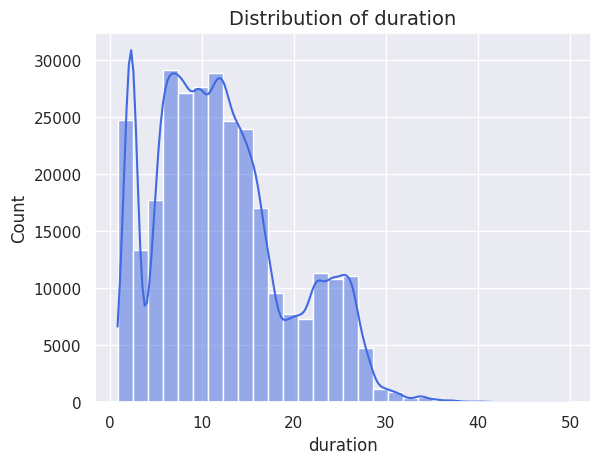

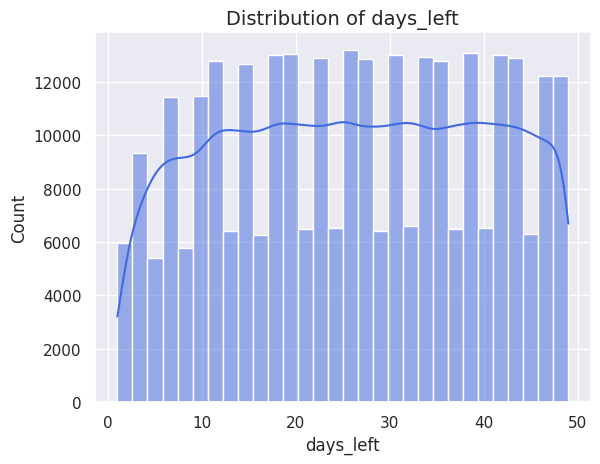

In [708]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms to see distribution of numeric

sns.set(style="darkgrid", palette="Set2", font_scale=1)
for i in Numeric:
  sns.histplot(df[i], bins=30, kde=True, color="royalblue")
  plt.title(f"Distribution of {i}", fontsize=14)
  plt.show()



# ❌ **price and duration are skewed** ❌



/tmp/ipython-input-1549475515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df["price"], orient="h", palette="Set2")
/tmp/ipython-input-1549475515.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df["duration"], orient="h", palette="Set2")


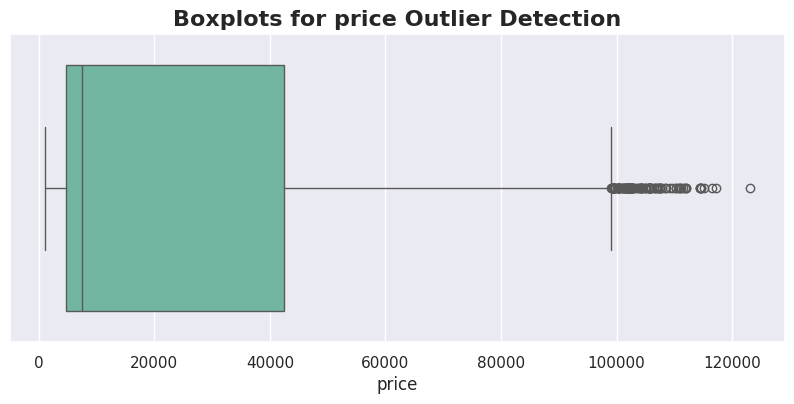

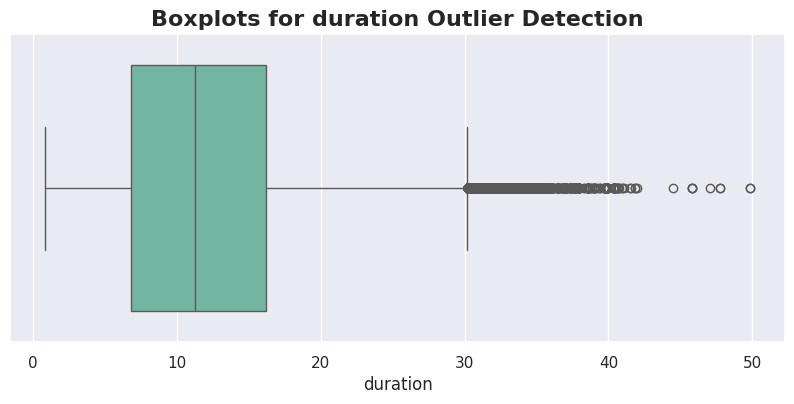

Number of duration outliers: 0
Number of price outliers: 123


In [709]:

plt.figure(figsize=(10, 4))
sns.boxplot(data=df["price"], orient="h", palette="Set2")
plt.title("Boxplots for price Outlier Detection", fontsize=16, fontweight="bold")



plt.figure(figsize=(10, 4))
sns.boxplot(data=df["duration"], orient="h", palette="Set2")
plt.title("Boxplots for duration Outlier Detection", fontsize=16, fontweight="bold")
plt.show()



###################################################
Q1d = df["duration"].quantile(0.25)
Q3d = df["duration"].quantile(0.75)
IQR_d = Q3 - Q1

lower_bound_d = Q1 - 1.5 * IQR
upper_bound_d = Q3 + 1.5 * IQR

outliers = df[(df["duration"] < lower_bound_d) | (df["duration"] > upper_bound_d)]
print("Number of duration outliers:", outliers.shape[0])

################################################

Q1p = df["price"].quantile(0.25)
Q3p = df["price"].quantile(0.75)
IQR_p = Q3 - Q1

lower_bound_p = Q1 - 1.5 * IQR
upper_bound_p = Q3 + 1.5 * IQR

outliers = df[(df["price"] < lower_bound_p) | (df["price"] > upper_bound_p)]
print("Number of price outliers:", outliers.shape[0])
################################################


❌ THERE IS 123 PRICE OUTLIERS AND 0 DURATION OUTLIERS

In [710]:
#dropping outliers of price
df = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]


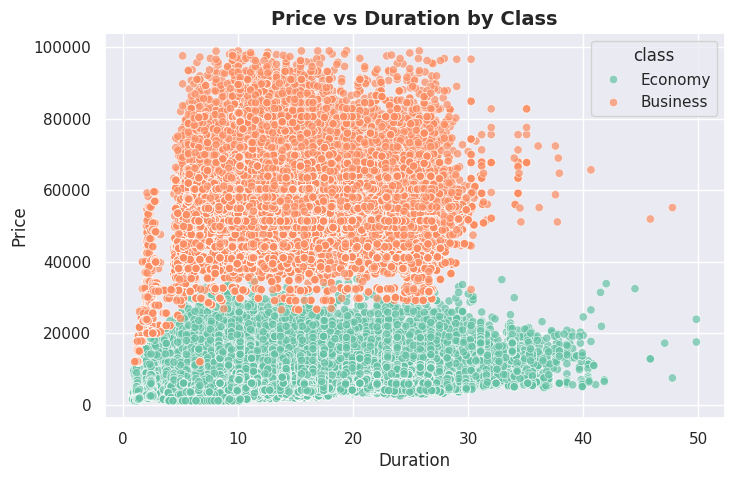

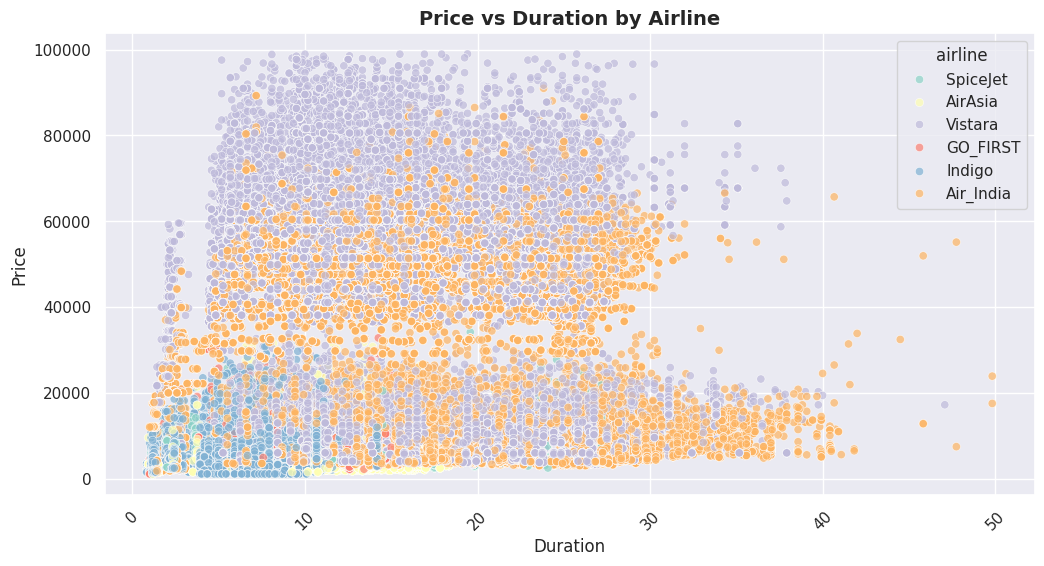

In [711]:
########### PRICE VS NUMERIC by grouping ###########

# Price vs Duration colored by stops
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="duration", y="price", hue="class", palette="Set2", alpha=0.7)
plt.title("Price vs Duration by Class", fontsize=14, fontweight="bold")
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

# Price vs Duration colored by Airline
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="duration", y="price", hue="airline", palette="Set3", alpha=0.7)
plt.title("Price vs Duration by Airline", fontsize=14, fontweight="bold")
plt.xlabel("Duration")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

❌ BUSINESS CLASS AFFECTS THE PRICE SIGNIFICANTLY ❌


### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.


/tmp/ipython-input-3558794897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="airline", y="price", data=df, palette="Set3")


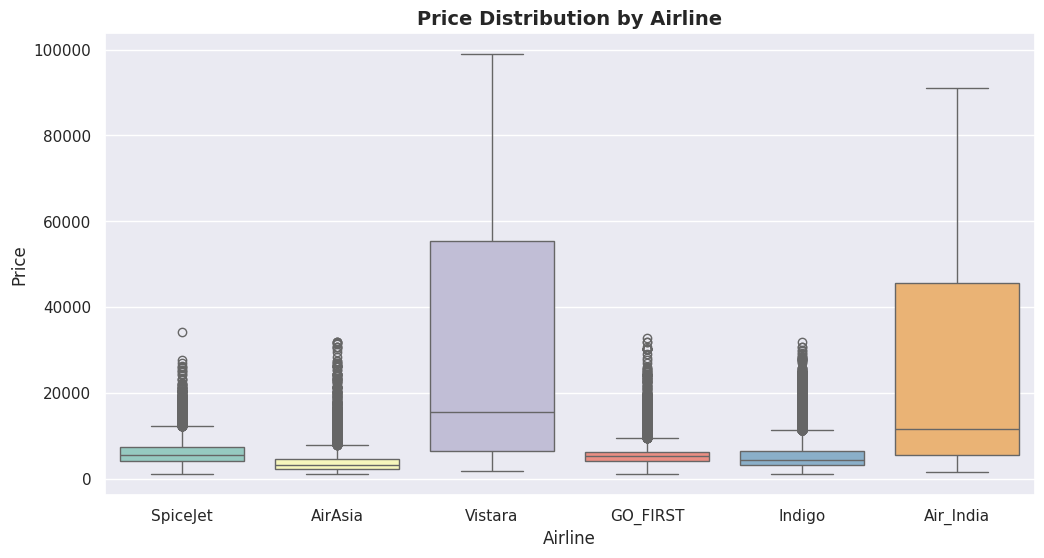

/tmp/ipython-input-3558794897.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="source_city", y="price", data=df, palette="Set3")


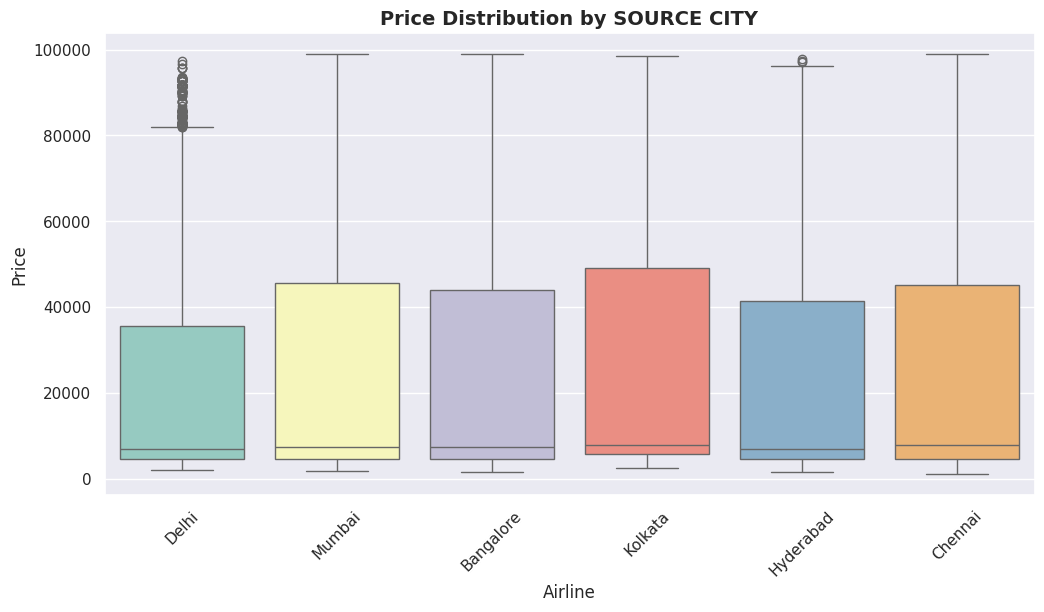

/tmp/ipython-input-3558794897.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="destination_city", y="price", data=df, palette="Set3")


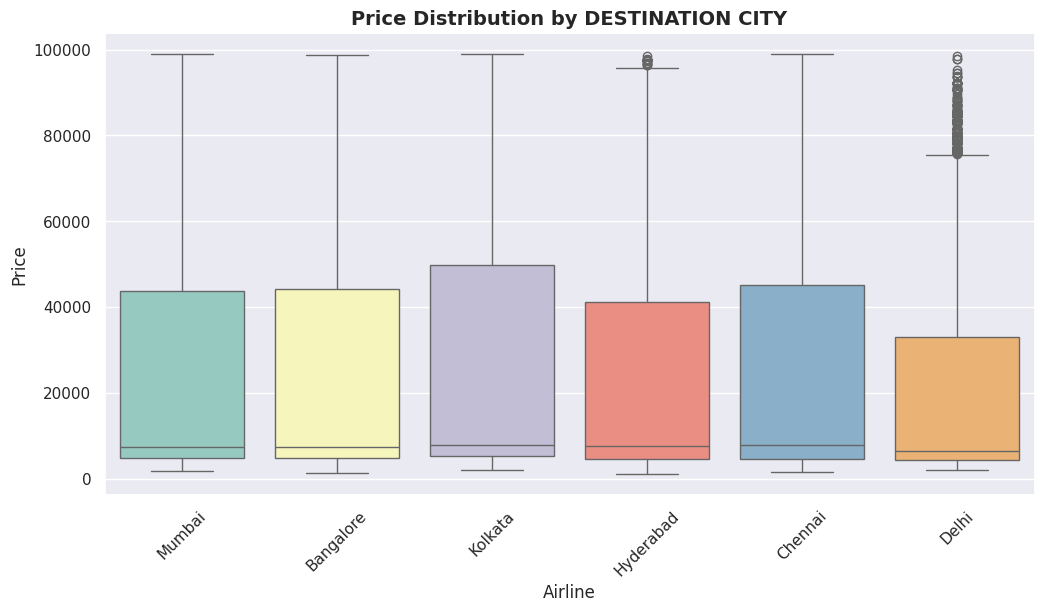

In [712]:
plt.figure(figsize=(12,6))
sns.boxplot(x="airline", y="price", data=df, palette="Set3")
plt.title("Price Distribution by Airline", fontsize=14, fontweight="bold")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="source_city", y="price", data=df, palette="Set3")
plt.title("Price Distribution by SOURCE CITY", fontsize=14, fontweight="bold")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="destination_city", y="price", data=df, palette="Set3")
plt.title("Price Distribution by DESTINATION CITY", fontsize=14, fontweight="bold")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


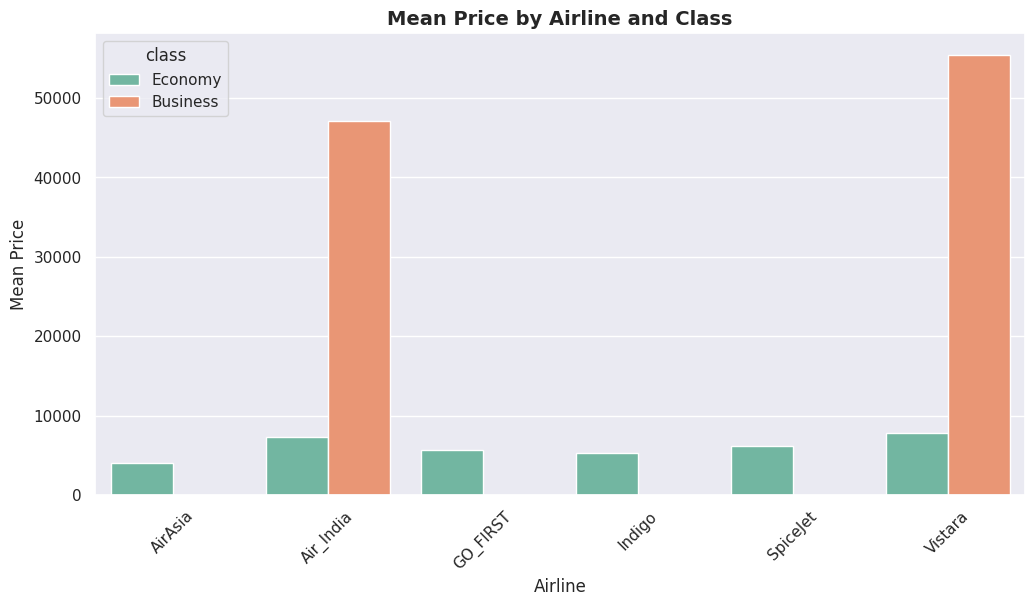

In [713]:
mean_price_airline_class = df.groupby(["airline", "class"])["price"].mean().reset_index()


plt.figure(figsize=(12,6))
sns.barplot(x="airline", y="price", hue="class", data=mean_price_airline_class, palette="Set2")
plt.title("Mean Price by Airline and Class", fontsize=14, fontweight="bold")
plt.xlabel("Airline")
plt.ylabel("Mean Price")
plt.xticks(rotation=45)
plt.show()

In [714]:
#Because Delhi and Kolkata are the least and highest price
df["is_delhi"] = df["destination_city"].apply(lambda x: 1 if x == "Delhi" else 0)
df["is_kolkata"] = df["destination_city"].apply(lambda x: 1 if x == "Kolkata" else 0)


/tmp/ipython-input-1768749885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["is_delhi"] = df["destination_city"].apply(lambda x: 1 if x == "Delhi" else 0)
/tmp/ipython-input-1768749885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["is_kolkata"] = df["destination_city"].apply(lambda x: 1 if x == "Kolkata" else 0)


/tmp/ipython-input-3399102338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2",hue = None , order=df[col].value_counts().index)


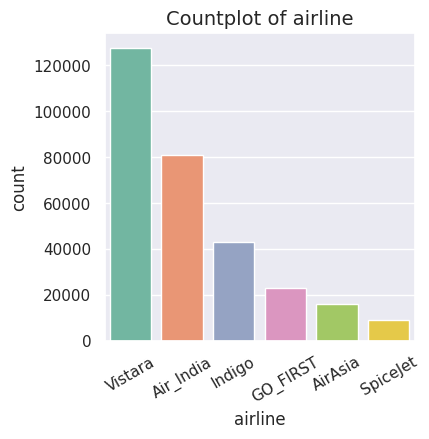

/tmp/ipython-input-3399102338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2",hue = None , order=df[col].value_counts().index)


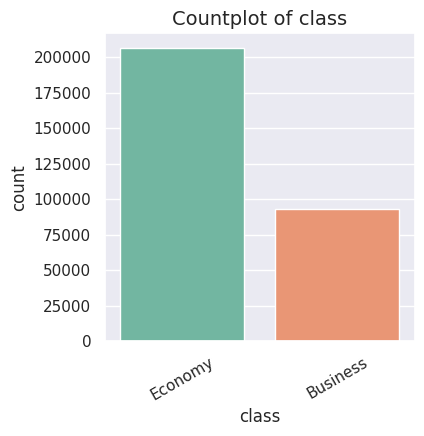

/tmp/ipython-input-3399102338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2",hue = None , order=df[col].value_counts().index)


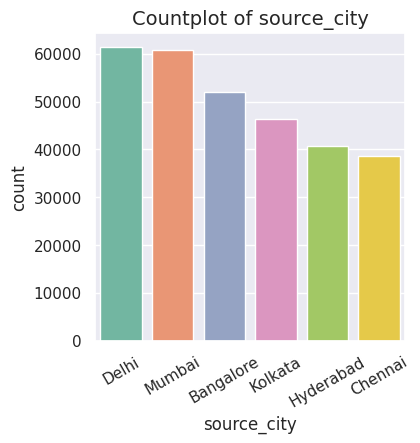

/tmp/ipython-input-3399102338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2",hue = None , order=df[col].value_counts().index)


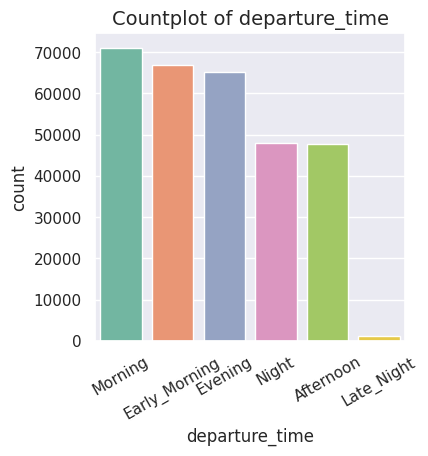

/tmp/ipython-input-3399102338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2",hue = None , order=df[col].value_counts().index)


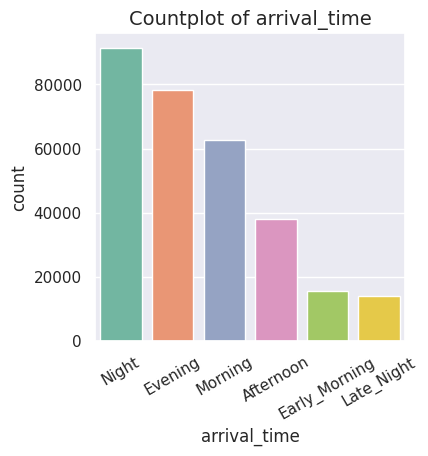

/tmp/ipython-input-3399102338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2",hue = None , order=df[col].value_counts().index)


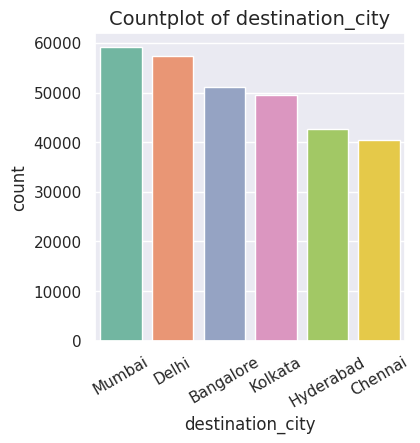

/tmp/ipython-input-3399102338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2",hue = None , order=df[col].value_counts().index)


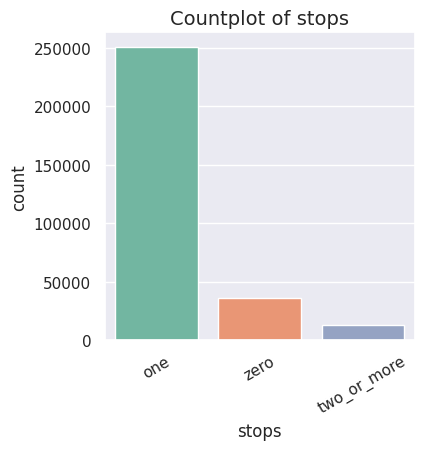

In [715]:
#visualizing the density of categorical
CO = ["airline","class","source_city","departure_time","arrival_time","destination_city","stops"]
for col in CO :
    plt.figure(figsize=(4,4))
    sns.countplot(data=df, x=col, palette="Set2",hue = None , order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}", fontsize=14)
    plt.xticks(rotation=30)
    plt.show()

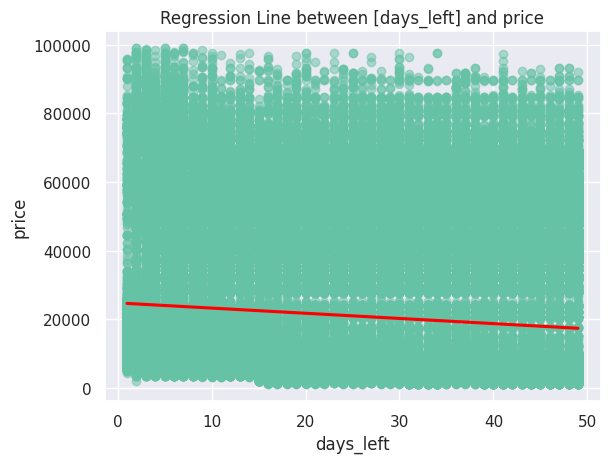

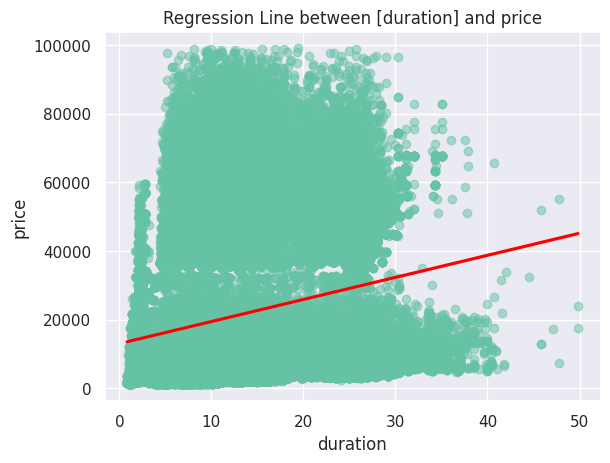

In [716]:
##The relation between didd. features and target :
for i in ["days_left","duration"]:
  sns.regplot(x=f"{i}", y="price", data=df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
  plt.title(f"Regression Line between [{i}] and price")
  plt.show()


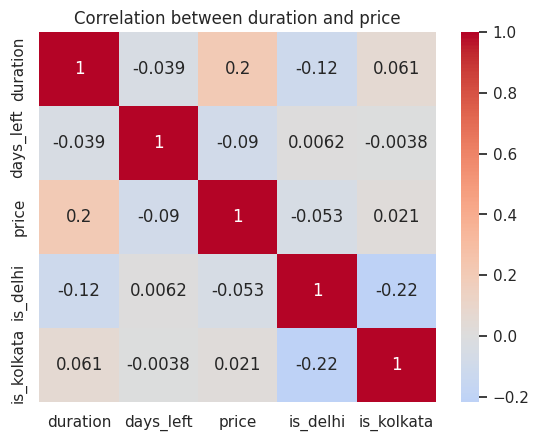

In [717]:
sns.heatmap(df.drop("index",axis=1).corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title(f"Correlation between {i} and price")
plt.show()

In [718]:
# Histograms to see distribution of categorical

In [719]:

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]
print("Number of outliers:", outliers.shape[0])

#dropping outliers of price
df = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

Number of outliers: 0


/tmp/ipython-input-1503386550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y="duration", data=df, palette="Set2")


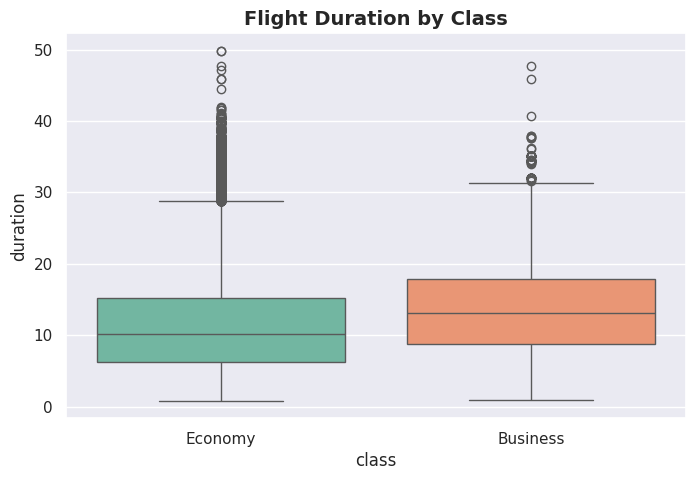

In [720]:

plt.figure(figsize=(8,5))
sns.boxplot(x="class", y="duration", data=df, palette="Set2")
plt.title("Flight Duration by Class", fontsize=14, fontweight="bold")
plt.show()

In [721]:
dfused = df.copy()
dfused.drop(["source_city","destination_city","flight"],axis=1,inplace=True)
nominal.remove("source_city")
nominal.remove("destination_city")


In [722]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,is_delhi,is_kolkata
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0,0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0,0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,0,0
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,0,0
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,0,0
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,0,0


In [723]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer
import numpy as np

"""
# Ordinal mapping
class_order = ["Economy", "Business"]
period_order = ["Morning", "Afternoon", "Evening", "Night", "Late_Night" , "Early_Morning" ]



ordinal_encoder = OrdinalEncoder(categories=[class_order, period_order])

# One-Hot encoding for nominal features
nominal_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')


# Numeric features scaling
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])



preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, Numeric),
    ('ord', ordinal_transformer, ordinal),
    ('nom', nominal_transformer, nominal)
])"""

'\n# Ordinal mapping\nclass_order = ["Economy", "Business"]\nperiod_order = ["Morning", "Afternoon", "Evening", "Night", "Late_Night" , "Early_Morning" ]\n\n\n\nordinal_encoder = OrdinalEncoder(categories=[class_order, period_order])\n\n# One-Hot encoding for nominal features\nnominal_transformer = OneHotEncoder(drop=\'first\', handle_unknown=\'ignore\')\n\n\n# Numeric features scaling\nnumeric_transformer = Pipeline([\n    (\'scaler\', StandardScaler())\n])\n\n\n\npreprocessor = ColumnTransformer(transformers=[\n    (\'num\', numeric_transformer, Numeric),\n    (\'ord\', ordinal_transformer, ordinal),\n    (\'nom\', nominal_transformer, nominal)\n])'

In [724]:
from sklearn.linear_model import LinearRegression
model_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])


In [725]:
df["flight"].value_counts()

,count
flight,
UK-706,3227
UK-772,2722
UK-720,2650
UK-836,2536
UK-822,2467
...,...
6E-2914,1
G8-107,1
SG-9974,1


In [726]:
dfused

,index,airline,departure_time,stops,arrival_time,class,duration,days_left,price,is_delhi,is_kolkata
0,0,SpiceJet,Evening,zero,Night,Economy,2.17,1,5953,0,0
1,1,SpiceJet,Early_Morning,zero,Morning,Economy,2.33,1,5953,0,0
2,2,AirAsia,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956,0,0
3,3,Vistara,Morning,zero,Afternoon,Economy,2.25,1,5955,0,0
4,4,Vistara,Morning,zero,Morning,Economy,2.33,1,5955,0,0
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,Morning,one,Evening,Business,10.08,49,69265,0,0
300149,300149,Vistara,Afternoon,one,Night,Business,10.42,49,77105,0,0
300150,300150,Vistara,Early_Morning,one,Night,Business,13.83,49,79099,0,0
300151,300151,Vistara,Early_Morning,one,Evening,Business,10.00,49,81585,0,0


In [727]:
ordinal

['stops', 'airline', 'class']

In [728]:
class_order

['Economy', 'Business']

In [729]:
period_order

['Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night', 'Early_Morning']

In [730]:
dfused

,index,airline,departure_time,stops,arrival_time,class,duration,days_left,price,is_delhi,is_kolkata
0,0,SpiceJet,Evening,zero,Night,Economy,2.17,1,5953,0,0
1,1,SpiceJet,Early_Morning,zero,Morning,Economy,2.33,1,5953,0,0
2,2,AirAsia,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956,0,0
3,3,Vistara,Morning,zero,Afternoon,Economy,2.25,1,5955,0,0
4,4,Vistara,Morning,zero,Morning,Economy,2.33,1,5955,0,0
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,Morning,one,Evening,Business,10.08,49,69265,0,0
300149,300149,Vistara,Afternoon,one,Night,Business,10.42,49,77105,0,0
300150,300150,Vistara,Early_Morning,one,Night,Business,13.83,49,79099,0,0
300151,300151,Vistara,Early_Morning,one,Evening,Business,10.00,49,81585,0,0


In [731]:
dfused["class"].value_counts()

,count
class,
Economy,206666
Business,93364


In [732]:

stops_order = ["zero", "one", "two_or_more"]
class_order = ["Economy", "Business"]
period_order = ["Morning", "Afternoon", "Evening", "Night", "Late_Night" , "Early_Morning" ]

oe = OrdinalEncoder(categories=[class_order, period_order,period_order,stops_order])
dfused[["class","departure_time","arrival_time" ,"stops"]] = oe.fit_transform(df[["class","departure_time","arrival_time" ,"stops"]])


In [733]:
dfused= pd.get_dummies(
    dfused,
    columns=["airline"],
    drop_first=True
)

In [734]:
X = dfused.drop(columns = ["price","index"])
y = dfused["price"]

In [735]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(Xf_train,yf_train)

LinearRegression()

In [736]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Get predictions
yf_pred = model.predict(Xf_test)


# Calculate metrics
mae = mean_absolute_error(yf_test, yf_pred)
mse = mean_squared_error(yf_test, yf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(yf_test, yf_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


MAE: 4509.31
MSE: 46787872.20
RMSE: 6840.17
R²: 0.9083


In [737]:
dfused["price"].mean()

np.float64(20855.326673999265)